<a href="https://colab.research.google.com/github/aakashr21/Fraud-Transaction-Detection/blob/main/Mid_course_assessment_for_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Online Payment Fraud Detection

##### **Project Type**    - Classification
##### **Name**  - Aakash R

## Problem statement - To predict whether the transaction is fraud or not


## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries for data wrangling
import numpy as np
import pandas as pd

# Import Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

#Import Libraries for model building
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix,ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

### Dataset Loading

In [ ]:
# Mounting drive
from google.colab import drive
drive.mount("/content/drive")

#loading dataset
df = pd.read_csv("/content/drive/MyDrive/Introduction to Machine Learning/Online payment fraud detection.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1


### Dataset First View

In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1


In [ ]:
# First five rows
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [ ]:
# Last five rows
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

print(df.shape)
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns")

(6362620, 10)
There are 6362620 rows and 10 columns


### Dataset Information

In [ ]:
#checking informatiom of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


#### Duplicate Values

In [ ]:
# checking for duplicate values
df.duplicated().sum()
print(f"There are {df.duplicated().sum()} number of duplicate values")

There are 0 number of duplicate values


#### Missing Values/Null Values

In [ ]:
# checking for missing values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

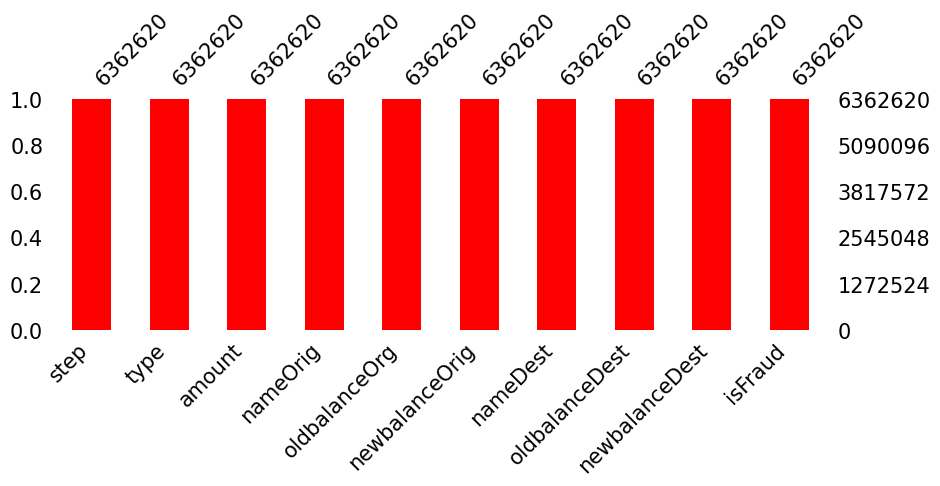

In [ ]:
# Visualizing the missing values
import missingno as msno
msno.bar(df, color='red',sort='ascending', figsize=(10,3), fontsize=15)
plt.show()

### What did you know about your dataset?

There are 6362620 rows and 10 columns in dataset.

In datset there are

*   3 Object data type columns.
*   2 integer data type columns.
*   5 float data type columns.
*   There are no missing values in the dataset.
*   There are no duplicate values present.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
columns = list(df.columns)
print("The columns present are :\n")
print(columns)

The columns present are :

['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud']


In [ ]:
# Dataset Describe
df.describe(include="all")

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6362620,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6.362620e+06
unique,NaN,5,NaN,6353307,NaN,NaN,2722362,NaN,NaN,NaN
top,NaN,CASH_OUT,NaN,C1902386530,NaN,NaN,C1286084959,NaN,NaN,NaN
freq,NaN,2237500,NaN,3,NaN,NaN,113,NaN,NaN,NaN
mean,2.433972e+02,NaN,1.798619e+05,NaN,8.338831e+05,8.551137e+05,NaN,1.100702e+06,1.224996e+06,1.290820e-03
std,1.423320e+02,NaN,6.038582e+05,NaN,2.888243e+06,2.924049e+06,NaN,3.399180e+06,3.674129e+06,3.590480e-02
min,1.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,NaN,1.338957e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,NaN,7.487194e+04,NaN,1.420800e+04,0.000000e+00,NaN,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.350000e+02,NaN,2.087215e+05,NaN,1.073152e+05,1.442584e+05,NaN,9.430367e+05,1.111909e+06,0.000000e+00


### Variables Description

* step: represents a unit of time where 1 step equals 1 hour
* type: type of online transaction
* amount: the amount of the transaction
* nameOrig: customer starting the transaction
* oldbalanceOrg: balance before the transaction
* newbalanceOrig: balance after the transaction
* nameDest: recipient of the transaction
* oldbalanceDest: initial balance of recipient before the transaction
* newbalanceDest: the new balance of recipient after the transaction
* isFraud: fraud transaction(0:Not Fraud,1:Fraud)

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
dtype: int64

In [ ]:
# list of unique values present in each columns

for column in columns:
  print(f"Unique values present in {column}\n")
  print(df[column].unique(),"\n")

Unique values present in step

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239

## 3. ***EDA***

In [ ]:
#fraud dataset
fraud_df = df[df["isFraud"]==1]
#not fraud dataset
nofraud_df = df[df["isFraud"]==0]

In [ ]:
# Distribution of step
df["step"].value_counts()

19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: step, Length: 743, dtype: int64

* There are 743 steps, and every step has at least 2 occurrences.

In [ ]:
# count of each transaction type
df["type"].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

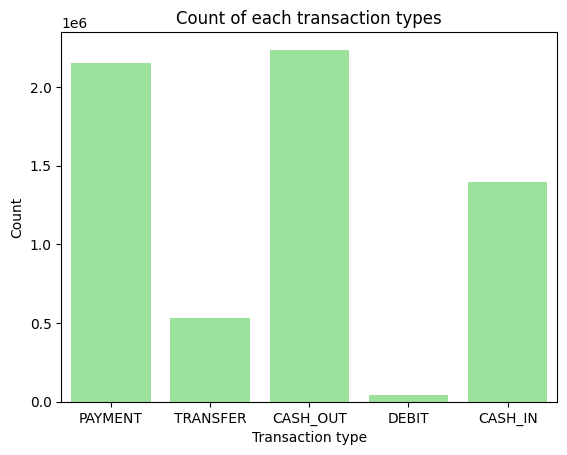

In [ ]:
# visualization of count of each transaction type
sns.countplot(x=df["type"],color="lightgreen")
plt.title("Count of each transaction types")
plt.xlabel("Transaction type")
plt.ylabel("Count")
plt.show()

* Cash out is the most numerous transaction type, followed by payment, cash in, transfer and debit types.

In [ ]:
#maximum and minimum amount transfered till now
print("The maximum amount transfered is",df["amount"].max())
print("The minimum amount transfered is",df["amount"].min())

The maximum amount transfered is 92445516.64
The minimum amount transfered is 0.0


Text(0.5, 1.0, 'Distribution of transaction amount')

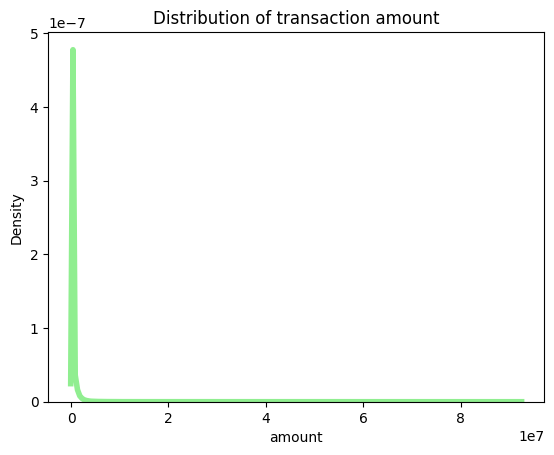

In [ ]:
# distribution of amount transfered
sns.kdeplot(df['amount'], linewidth=4,color="lightgreen")
plt.title('Distribution of transaction amount')

* The distribution of transaction amounts is right skewed.
* This indicates that most values are clustered around the left tail of the distribution, with the longer right tail.


In [ ]:
#count of fraud and not fraud transactions
df["isFraud"].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

Text(0.5, 1.0, 'Percentage of transactions')

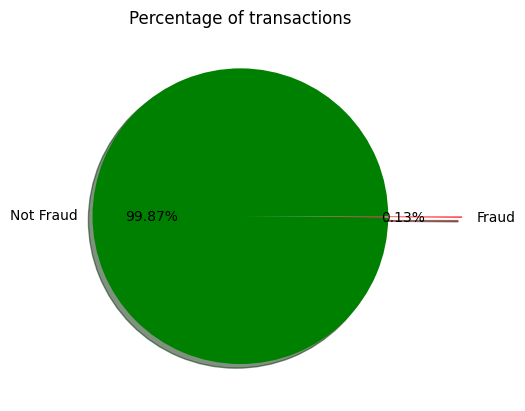

In [ ]:
fraud_count=df["isFraud"].value_counts()
plt.pie(x=fraud_count.values,labels=["Not Fraud","Fraud"],autopct='%.2f%%',explode=[0,0.5],shadow=True,colors=['green','red'])
plt.title("Percentage of transactions")

* 8213(0.13%) transactions are only fraud transactions.
* Remaining 6354407(99.87%) transactions are not fraud transactions.

In [ ]:
#Top10 steps with fraud transactions
fraud_df.groupby("step")["isFraud"].count().sort_values(ascending=False)

step
212    40
523    30
387    28
425    28
249    28
       ..
202     2
589     2
112     2
548     2
662     2
Name: isFraud, Length: 741, dtype: int64

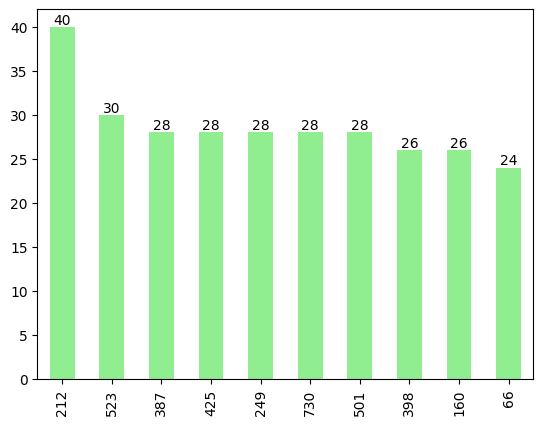

In [ ]:
df2 = fraud_df['step'].value_counts().head(10)
ax = df2.plot(kind='bar', color='lightgreen')
for container in ax.containers:
    ax.bar_label(container)

* This shows that higher the steps value higher the chance of fraud transaction

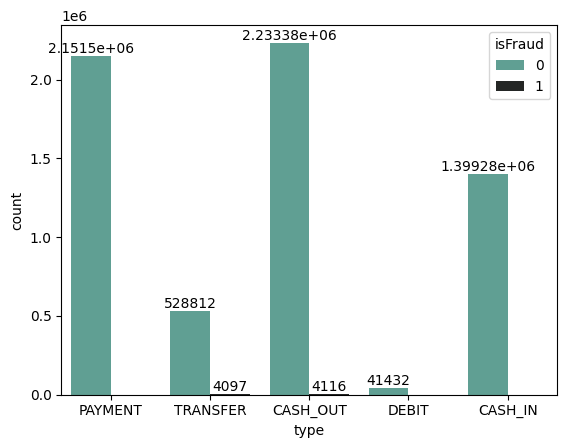

In [ ]:
#relation between transaction type and fraud
graph=sns.countplot(data=df,x="type",hue="isFraud",palette="dark:#5A9_r")
for container in graph.containers:
    graph.bar_label(container)

* Fraudulent transactions only occur in cash out and transfer types.

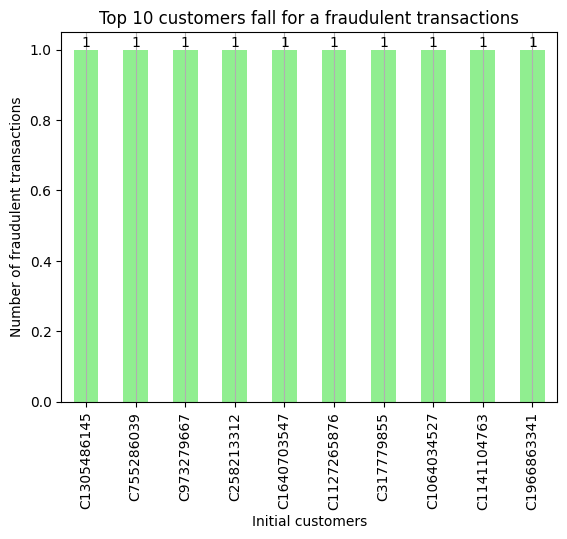

In [ ]:
#top 10 scammed customers
scammed_cust = fraud_df['nameOrig'].value_counts().head(10)
ax = scammed_cust.plot(kind='bar', color='lightgreen')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 customers fall for a fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Initial customers')
plt.grid(axis='x')
plt.show()

* Initial customers are scammed of at most one for a fraudulent transaction.

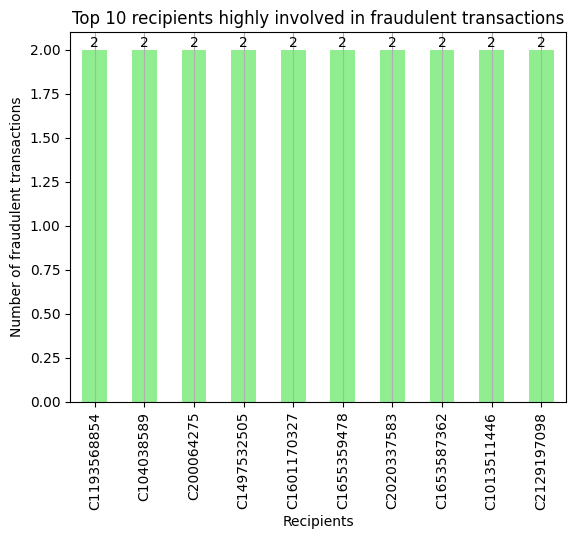

In [ ]:
scammed_re = fraud_df['nameDest'].value_counts().head(10)
ax1 = scammed_re.plot(kind='bar', color='lightgreen')
for container in ax1.containers:
    ax1.bar_label(container)
plt.title('Top 10 recipients highly involved in fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Recipients')
plt.grid(axis='x')
plt.show()

* Suspicious recipients only have a maximum of 2 involved fraudulent transactions.

<ipython-input-29-543a03894592>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df3 = df.corr()


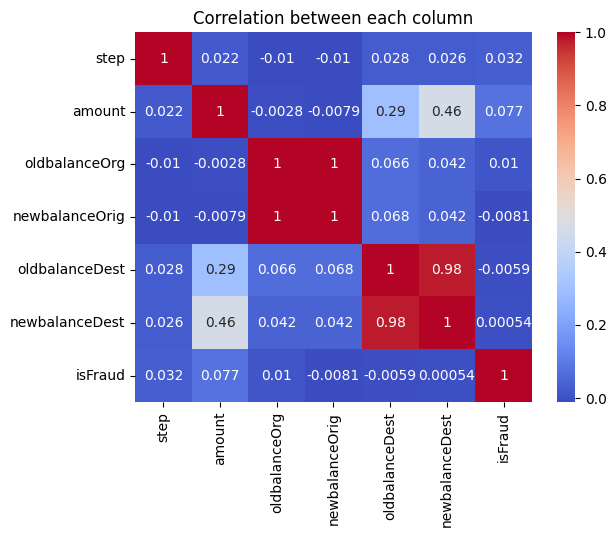

In [ ]:
#correlation between each columns
df3 = df.corr()
sns.heatmap(data=df3,annot=True,cmap="coolwarm")
plt.title("Correlation between each column")
plt.show()

* oldbalanceOrg and newbalanceOrig has strong positive relationship.
* oldbalanceDest and newbalanceDest has strong positive relationship.
* oldbalanceOrg and amount has weak positive relationship.
* newbalanceOrig and amount has moderate positive relationship.

## 4. ***Insight Gained***

* There are 743 steps, and every step has at least 2 occurrences.
* Cash out is the most numerous transaction type, followed by payment, cash in, transfer and debit types.
* The distribution of transaction amounts is right skewed.
* The most values of amount are clustered around the left tail of the distribution, with the longer right tail.
* 8213(0.13%) transactions are only fraud transactions.
* Remaining 6354407(99.87%) transactions are not fraud transactions.
* Higher the steps value higher the chance of fraud transaction.
* Fraudulent transactions only occur in cash out and transfer types.
* Initial customers are scammed of at most one for a fraudulent transaction.
* Suspicious recipients only have a maximum of 2 involved fraudulent transactions.
* OldbalanceOrg and newbalanceOrig has strong positive relationship.
* OldbalanceDest and newbalanceDest has strong positive relationship.
* OldbalanceOrg and amount has weak positive relationship.
* NewbalanceOrig and amount has moderate positive relationship.

## 5. ***Data Preprocessing***

In [ ]:
# Data preprocessing
df['type'] = df['type'].map({'PAYMENT':0, 'CASH_IN':1, 'DEBIT':2, 'CASH_OUT':3, 'TRANSFER':4})

In [ ]:
# standardization
X = df[['step','type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]
Y = df['isFraud']
scaler = StandardScaler()
X = scaler.fit_transform(X)
scaled_X = pd.DataFrame(X,columns=['step','type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest'])

## 6. ***Model Building***

In [ ]:
# splitting dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(scaled_X, Y, random_state=42, test_size = 0.2)

In [ ]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (5090096, 7)
Number transactions y_train dataset:  (5090096,)
Number transactions X_test dataset:  (1272524, 7)
Number transactions y_test dataset:  (1272524,)


In [ ]:
# Logistic regression model
logreg = LogisticRegression()

# Fit the Algorithm
logreg.fit(X_train,y_train)

# Predict on the model
y_pred = logreg.predict(X_test)



Accuracy: 0.999217
Precision: 0.916000
Recall: 0.424074
F1 score: 0.579747
ROC AUC: 0.712012
[[1270841      63]
 [    933     687]]


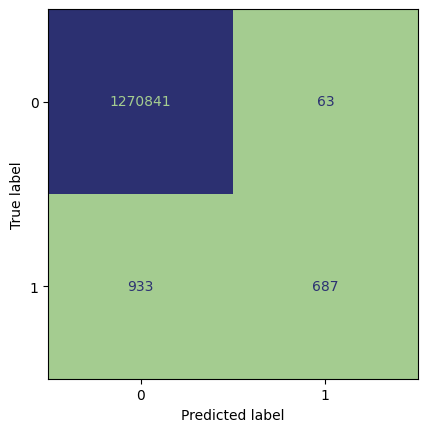

In [ ]:
# Model Evaluation
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

# ROC AUC
auc = roc_auc_score(y_test, y_pred)
print('ROC AUC: %f' % auc)

# confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

#display confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, colorbar=False, values_format='', cmap='crest')

In [ ]:
#count of values before oversampling
print("Before OverSampling, counts of label '1': {}".format(sum(Y == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y == 0)))

Before OverSampling, counts of label '1': 8213
Before OverSampling, counts of label '0': 6354407 



In [ ]:
#oversampling for handling imbalance data
smote = SMOTE()
X_smote,y_smote = smote.fit_resample(scaled_X,Y)

In [ ]:
#count of values after oversampling
print("After OverSampling, counts of label '1': {}".format(sum(y_smote == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_smote == 0)))

After OverSampling, counts of label '1': 6354407
After OverSampling, counts of label '0': 6354407 



In [ ]:
# splitting dataset into train and test for oversampled data
X_ostrain, X_ostest, y_ostrain, y_ostest = train_test_split(X_smote, y_smote, random_state=42, test_size = 0.2)

In [ ]:
print("Number transactions X_ostrain dataset: ", X_ostrain.shape)
print("Number transactions y_ostrain dataset: ", y_ostrain.shape)
print("Number transactions X_ostest dataset: ", X_ostest.shape)
print("Number transactions y_ostest dataset: ", y_ostest.shape)

Number transactions X_ostrain dataset:  (10167051, 7)
Number transactions y_ostrain dataset:  (10167051,)
Number transactions X_ostest dataset:  (2541763, 7)
Number transactions y_ostest dataset:  (2541763,)


In [ ]:
# Logistic regression model for oversampled data
logreg2 = LogisticRegression()

# Fit the Algorithm
logreg2.fit(X_ostrain,y_ostrain)

# Predict on the model
y_pred2 = logreg2.predict(X_ostest)

Accuracy: 0.953295
Precision: 0.952547
Recall: 0.954126
F1 score: 0.953336
ROC AUC: 0.953295
[[1210428   60409]
 [  58303 1212623]]


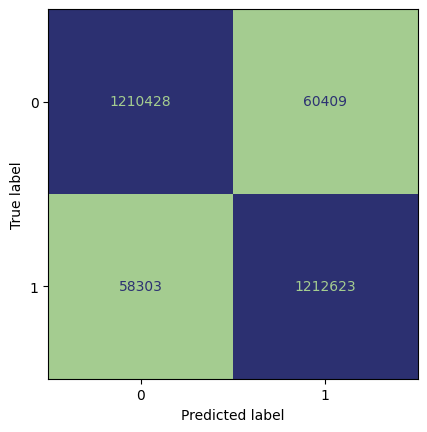

In [ ]:
# Model Evaluation for logistic regression on oversampled data
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_ostest, y_pred2)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_ostest, y_pred2)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_ostest, y_pred2)
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_ostest, y_pred2)
print('F1 score: %f' % f1)

# ROC AUC
auc = roc_auc_score(y_ostest, y_pred2)
print('ROC AUC: %f' % auc)

# confusion matrix
matrix = confusion_matrix(y_ostest, y_pred2)
print(matrix)

#display confusion matrix
ConfusionMatrixDisplay.from_predictions(y_ostest, y_pred2, colorbar=False, values_format='', cmap='crest')

In [ ]:
# random forest classifier model
rfc = RandomForestClassifier(n_estimators=7,criterion='entropy',class_weight='balanced', random_state=42)

#fit model
rfc.fit(X_ostrain,y_ostrain)

#predict
y_pred3 = rfc.predict(X_ostest)

Accuracy: 0.999508
Precision: 0.999086
Recall: 0.999930
F1 score: 0.999508
ROC AUC: 0.999508
[[1269675    1162]
 [     89 1270837]]


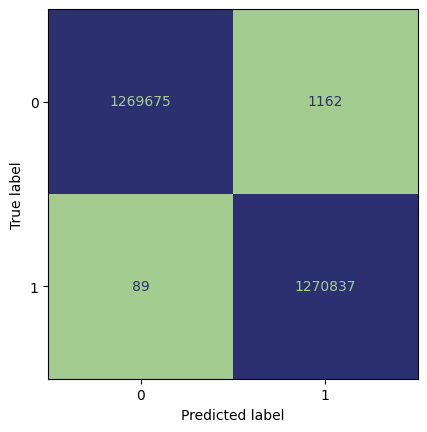

In [ ]:
# Model Evaluation for random forest classifier
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_ostest, y_pred3)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_ostest, y_pred3)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_ostest, y_pred3)
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_ostest, y_pred3)
print('F1 score: %f' % f1)

# ROC AUC
auc = roc_auc_score(y_ostest, y_pred3)
print('ROC AUC: %f' % auc)

# confusion matrix
matrix = confusion_matrix(y_ostest, y_pred3)
print(matrix)

#display confusion matrix
ConfusionMatrixDisplay.from_predictions(y_ostest, y_pred3, colorbar=False, values_format='', cmap='crest')

In [ ]:
#Testing on model
test = df.sample(1)
xtest = test.loc[:,['step','type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]
ytest = test.iloc[:,-1]
pred = rfc.predict(xtest)
if pred[0] == ytest.values[0]:
  print("Model prediction is correct")
  print(f"Predicted value :{pred[0]} Correct value: {ytest.values[0]}")
else:
  print("Model prediction is not correct")
  print(f"Predicted value :{pred[0]} Correct value: {ytest.values[0]}")

Model prediction is correct
Predicted value :0 Correct value: 0


## 7. ***Conclusion***

* In model 1 which is developed on imbalanced dataset Logistic Regression:
 1. Accuracy: 0.999217
 2. Precision: 0.916000
* In model 2 which is developed on balanced dataset using SMOTE and Logistic Regression:
 1. Accuracy: 0.953297
 2. Precision: 0.952561

  In precision is increased by 4% but accuracy is reduced by 4%.
* In  model3 which is developed on balanced dataset using RandomForestClassifier Ensemble technique:
 1. Accuracy: 0.999515
 2. Precision: 0.999087

  In this model the accuracy and precision are at 99%.

So,we can say that model 3 build using RandomForestClassifier is the suitable and best performing model for identifying fraudulent and non-fraudulent payments.

